# INFO 2950 Final Project

In [1]:
#pip install linearmodels

In [2]:
#Imports
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import requests
from bs4 import BeautifulSoup
import os
import re
import pdfplumber
import duckdb
import statsmodels.api as sm
from io import BytesIO
from linearmodels.panel import PanelOLS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Introduction:

The rapid adoption of electric vehicles (EVs) is pivotal in reducing greenhouse gas emissions and transitioning towards sustainable transportation. As the U.S. pushes towards a more sustainable future, understanding what drives EV adoption is becoming increasingly important. This project seeks to explore key determinants of state-level EV registrations, including federal incentives, renewable energy production, EV pricing, and charging infrastructure availability, to build predictive models for EV registration growth.


**Our primary research question is: ***What factors reliably predict EV registration growth across U.S. states, and how do these vary by region?***** To address this question, we hypothesize that (1) EV registrations increase with the total number of federal incentives and (2) EV registrations are positively correlated with a state's renewable energy production. Both hypotheses are tested using state-level data over multiple years, employing linear regression models to evaluate the impact of these variables on EV adoption trends.


To make this analysis focused and actionable, we narrowed the scope of our project to five states: **California, Florida, Texas, Washington, and New Jersey**. These states were selected because they lead the nation in both EV registrations and growth from 2016 to 2023. By studying these key states, we aim to identify patterns and strategies that could potentially be scaled to other regions in the future.


The data for this analysis is drawn from publicly available sources, including the U.S. Department of Energy's Alternative Fuels Data Center, the Energy Information Administration, and Open Charge Map. The dataset includes national-level variables (e.g., federal EV incentives, EV pricing) and state-level variables (e.g., charging station availability, renewable energy production). To ensure fair comparisons, we calculated EV registrations per capita, which accounts for population differences across states.


Preliminary trends suggest that []. By identifying the most influential factors driving this growth, our predictive model aims to guide policymakers and stakeholders in designing effective strategies to accelerate EV adoption. This work not only sheds light on current trends but also provides actionable insights to support smarter policies, targeted infrastructure investments, and a smoother transition to a cleaner, more sustainable transportation future.


## Data Description and Cleaning:

## Data Cleaning File
You can view the complete data cleaning workflow in the following notebook:  
[Data Cleaning Notebook on GitHub](https://github.com/kyle-du/info2950final/blob/069ac910e6cf0416bb1d4c1ef41fcb39437c3dc5/INFO2950_Phase%204_Data.ipynb)

### What are the observations (rows) and the attributes (columns)?
- **Observations**:  
  Each row in the dataset represents a specific entity (e.g., a year-state combination for state-level EV registrations or federal incentives).  
- **Attributes**:  
  - **Year**  
  - **State**  
  - **Total EV registrations**
  - **Total EV registrations per Capita**
  - **Lowest EV Price of the Year**
  - **Population (by State by Year)**
  - **Federal Incentives Count (by year)**

---

### Why was this dataset created?
The dataset was created to explore and analyze the factors influencing electric vehicle (EV) adoption across states, focusing on variables such as federal incentives, pricing, renewable energy production, and infrastructure availability. This analysis aims to provide insights into how policy and economic factors shape EV adoption trends.

---

### Who funded the creation of the dataset?
The dataset compilation and underlying sources are funded by public organizations such as:
- U.S. Department of Energy (DOE)
- U.S. Energy Information Administration (EIA)
- Open Charge Map
- U.S. Census Bureau 

---

### What processes might have influenced what data was observed and recorded, and what was not?
- Data accuracy may vary depending on reporting standards and processes across states.  
- External events, such as changes in data collection methods or interruptions (e.g., pandemic years), may influence what was observed or omitted.  

---

### What preprocessing was done, and how did the data come to be in the form that you are using?
- The dataset was preprocessed through the following steps to ensure it was clean, consistent, and ready for analysis:

- **Data Collection**:  
  - We gathered data from multiple sources, including:
    - **EV registrations**: U.S. Department of Energy's Alternative Fuels Data Center.
    - **Population data**: U.S. Census Bureau datasets for 2010–2023.
    - **Charging station data**: Open Charge Map.
    - **Renewable energy production**: Energy Information Administration (EIA).
    - **Federal incentives and EV pricing**: Various publicly available sources.

- **Data Scraping and Cleaning**:  
  - Some data (e.g., federal incentives) was scraped and compiled manually where necessary.
  - Redundant or irrelevant columns were dropped, and formatting inconsistencies (e.g., commas in numeric values) were corrected.

- **Population Data Preprocessing**:  
  - Combined datasets covering 2010–2023.
  - Filtered for the five states with the highest EV growth and registrations: **California, Florida, Texas, Washington, and New Jersey**.
  - Reshaped the data into a long format with columns for `State`, `Year`, and `Population`.
  - Merged population data with EV registration data to calculate EV registrations per capita.

- **EV Registration Data Cleaning**:  
  - Focused exclusively on electric vehicles, excluding other types like hybrids and biodiesel vehicles.
  - Filtered data for the selected states and relevant years (2016–2023).

- **Charging Station Data**:  
  - Standardized the dataset to include charging stations per capita for each state and year.

- **Renewable Energy and Incentives Data**:  
  - Refined the datasets to focus on cumulative production and total federal incentives for each state by year.

- **Final Dataset**:  
  - All datasets were merged using common keys such as `State` and `Year`.
  - Normalization steps, such as calculating EV registrations per capita and charging stations per capita, ensured comparability across states.

These preprocessing steps allowed us to build a comprehensive dataset for analyzing the relationships between EV adoption and factors like federal incentives, renewable energy production, and infrastructure availability.








---

### If people are involved, were they aware of the data collection, and if so, what purpose did they expect the data to be used for?
- As the data primarily originates from governmental agencies and public resources, individuals contributing to or represented in the data (e.g., EV owners) may not have been directly aware of its collection.  
- Agencies and organizations were likely aware that the data would be used for research, policy evaluation, and public awareness campaigns.

---

### Where can your raw source data be found?  
The raw source data is hosted online and can be accessed at the following links:  

1. **Vehicle Registration Counts by State**  
   - **Data Source**: U.S. Department of Energy - Alternative Fuels Data Center (AFDC)  
   - **URL**: [Vehicle Registration Data](https://afdc.energy.gov/vehicle-registration?year=2023)  

2. **Renewable and Total Energy Production by State**  
   - **Data Source**: U.S. Energy Information Administration (EIA) – State Energy Data System (SEDS)  
   - **URLs**:  
     - [Website](https://www.eia.gov/renewable/data.php)  
     - [Production Report PDF](https://www.eia.gov/state/seds/sep_prod/SEDS_Production_Report.pdf) (pages 18-119)  

3. **EV Retail Prices by Models**  
   - **Data Source**: U.S. Department of Energy - Office of Energy Efficiency & Renewable Energy  
   - **URL**: [EV Pricing Data](https://www.fueleconomy.gov/feg/PowerSearch.do?action=noform&year1=2016&year2=2023&minmsrpsel=0&maxmsrpsel=0&city=0&hwy=0&comb=0&cbvtelectric=Electric&YearSel=2016-2023&make=&mclass=&vfuel=&vtype=Electric&trany=&drive=&cyl=&MpgSel=000&sortBy=Comb&Units=&url=SearchServlet&opt=new&minmsrp=0&maxmsrp=0&minmpg=0&maxmpg=0&sCharge=&tCharge=&startstop=&cylDeact=&rowLimit=200&pageno=1&tabView=0)  

4. **EV Charge Stations**  
   - **Data Source**: Open Charge Map  
   - **URL**: [EV Charging Data](https://openchargemap.org/site/develop/api#/)  

5. **Federal and State Incentives Related to Alternative Fuels and Vehicles**  
   - **Data Source**: U.S. Department of Energy - Alternative Fuels Data Center (AFDC)  
   - **URL**: [Federal and State Incentives Data](https://afdc.energy.gov/laws/state)
   - The specific CSV file can be downloaded by visiting the provided URL and selecting "Download Data" at the bottom of the page. Once redirected, apply the following filters for each field before downloading:
       - Dataset: "Laws and Incentives"
       - Jurisdiction: "All"
       - Technology: "All-Electric Vehicles (EV)"
       - Incentive Type: "All"
       - Regulation Type: "All"
       - User Type: "All"
       - File Format: "CSV (opens in Excel)"

6. **State Population Totals**  
   - **Data Source**: United States Census Bureau 
   - **URL**: [State Population Data (2010-2019)](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage_1574439295) and [State Population Data (2020-2023)](https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html)
   - The files can be downloaded directly from their respective pages.
       - For population data from **2010** to **2019**, download the file titled:
           -  Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2019 (NST-EST2019-01) [<1.0 MB].
        - For population data from **2020** to **2023**, download the file titled:
            - Annual Estimates of the Resident Population for the United States, Regions, States, District of Columbia, and Puerto Rico: April 1, 2020 to July 1, 2023 (NST-EST2023-POP) [<1.0 MB].

In [3]:
# This dataset was compiled and cleaned in our separate data cleaning notebook.
# For full citations, please refer to INFO2950_Phase_4_Data in the GitHub repository.
# Or in the Acknowledgements and Bibliography section. 

# Clean, merged data file
data = pd.read_csv('final_ev_dataset.csv')

display(data.head(n=10))

,year,state,registration,population,reg_per_capita,min_price,incentives,renewable_prod,charge_stations,new_reg_per_capita,reg_rate_per_capita,charge_per_capita
0,2017,California,189700.0,39358497,0.004820,25220.0,20,2065.200195,1721,122.464026,33.411722,4.372626
1,2018,California,273500.0,39461588,0.006931,25220.0,21,2771.399902,1934,212.358408,43.798365,4.900969
2,2019,California,349700.0,39512223,0.008850,25320.0,21,2786.600098,5592,192.851716,27.697206,14.152583
3,2020,California,425300.0,39503200,0.010766,29900.0,21,478.200012,6258,191.376901,21.646309,15.841755
4,2021,California,563100.0,39145060,0.014385,36030.0,33,1986.200073,6288,352.023985,33.611998,16.063330
5,2022,California,903600.0,39040616,0.023145,28100.0,46,2645.800049,6302,872.168615,60.898130,16.142163
6,2017,Florida,15900.0,20963613,0.000758,25220.0,20,346.700012,525,20.511731,34.779628,2.504339
7,2018,Florida,27400.0,21244317,0.001290,25220.0,21,527.599976,590,54.132124,70.050064,2.777213
8,2019,Florida,40300.0,21477737,0.001876,25320.0,21,682.200012,1433,60.062194,45.481824,6.672025
9,2020,Florida,58200.0,21591299,0.002696,29900.0,21,484.699982,1526,82.903766,43.657296,7.067662


## Preregistration Statements: 

<p style="padding-bottom: 15px;">The following analyses aim to elucidate the impact of federal incentives and renewable energy production on EV adoption at the state level, providing insights for policymakers to design effective strategies to promote sustainable transportation.</p>

### Preregistration Statement 1

- **Hypothesis**:  
  State-level electric vehicle (EV) registrations increase with the total number of federal incentives available.

- **Context**:  
  Federal incentives, such as tax credits and subsidies, are designed to reduce the upfront cost of EVs, making them more accessible to consumers. Studies have shown that these incentives significantly influence consumer purchasing decisions, leading to higher EV adoption rates. For instance, research indicates that federal tax credits have been a major driver in the growth of the EV market in the United States (Javadnejad et al., 2023).

- **Analysis**:  
  To test this hypothesis, we will run a linear regression per state with the total count of federal EV incentives as the independent variable and the total EV registrations in the state as the dependent variable. We will test whether βfederal_incentives > 0 for each model, which would indicate that an increase in total federal incentives is associated with increased total EV registrations at the state level.  
---
### Preregistration Statement 2

- **Hypothesis**:  
  State-level EV registrations increase with the state's renewable energy production.

- **Context**:  
  States that produce more renewable energy may foster a culture of environmental consciousness, leading to higher EV adoption rates. Additionally, consumers in these states might prefer EVs to align with the clean energy available, reducing the overall carbon footprint of their transportation. Research has shown a correlation between renewable energy policies and increased EV adoption, suggesting that the availability of clean energy sources can influence consumer behavior (Das & Bhat, 2021).

- **Analysis**:  
  For this hypothesis, we will run a linear regression per state with the renewable energy production of the state as the independent variable and the total EV registrations in the state as the dependent variable. We will test whether βrenewable_energy > 0 for each model, which would indicate that an increase in a state’s renewable energy production is associated with increased total EV registrations of the state.  

## Data Analysis: 

**Part 1: Preregistration Statement 1**: Federal Incentives

Here we will build a linear regression model for federal incentives, looking at the impact of increasing federal incentives on EV adoption rates per capita in a state. We use an Ordinary Least Squares (OLS) regression model, which minimizes the sum of the squared errors to find a linear coefficient for the effect between the dependent variable (EV adoption) and the independent variable (federal incentives).

In [9]:
# Train, Test split
train, test = train_test_split(
    data, 
    test_size=0.1, 
    random_state=2950
)

# Train data
X_train_ps1 = train[['incentives']] 
X_train_ps1 = sm.add_constant(X_train_ps1) 
y_train_ps1 = train['new_reg_per_capita']

# Fit model
model_ps1 = sm.OLS(y_train_ps1, X_train_ps1)
results = model_ps1.fit()

print(results.summary())

# Test data
X_test_ps1 = test[['incentives']] 
X_test_ps1 = sm.add_constant(X_test_ps1)
y_test_ps1 = test['new_reg_per_capita']

# Make predictions
train_pred_ps1 = results.predict(X_train_ps1)
test_pred_ps1 = results.predict(X_test_ps1)

# Residuals
residuals_ps1 = y_train_ps1 - train_pred_ps1
display(residuals.head())

# Residual Plot
def residual_plot(pred, resid):
    plt.scatter(pred, resid, marker='o')
    plt.axhline(y=0, color='red')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals') 
    plt.show()

residual_plot(train_pred_ps1, residuals_ps1)

                            OLS Regression Results                            
Dep. Variable:     new_reg_per_capita   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     37.74
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           2.01e-06
Time:                        23:39:22   Log-Likelihood:                -166.20
No. Observations:                  27   AIC:                             336.4
Df Residuals:                      25   BIC:                             339.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -203.7527     66.575     -3.060      0.0

NameError: name 'residuals' is not defined

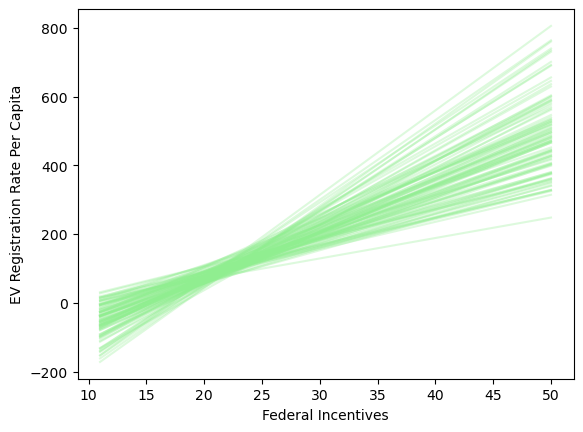

In [5]:
bootstrapped_states = list()
for i in range(100):
    bootstrapped_sample = data.sample(n=25, replace=True)
    bootstrapped_states.append(bootstrapped_sample)

domain = np.arange(11, 51).reshape(-1, 1)

for i in range(100):
    df = bootstrapped_states[i]

    bt_model = LinearRegression().\
    fit(df[["incentives"]].values, df["new_reg_per_capita"].values)
    y_pred = bt_model.predict(domain)
    sns.lineplot(x=domain.\
                 reshape(-1), y=y_pred, color="lightgreen", alpha=0.3)

# Given code
plt.xlabel("Federal Incentives")
plt.ylabel("EV Registration Rate Per Capita")
plt.show()

The lines indicate the relationship between the independent variable (Federal Incentives) and the dependent variable (New Registrations Per Capita). The fact that most lines slope upwards suggests a positive relationship between the two variables, meaning higher federal incentives are generally associated with more registrations per capita.

The coefficient is more stable around 15-30 federal incentives, suggesting that our model may be more inaccurate for predicting the effect of a large amount of federal incentives on EV adoption.

**Part 2: Preregistration Statement 2**

In [6]:
# Train data
X_train_ps2 = train[['renewable_prod']] 
X_train_ps2 = sm.add_constant(X_train_ps2) 
y_train_ps2 = train['new_reg_per_capita']

# Fit model
model_ps2 = sm.OLS(y_train_ps2, X_train_ps2)
results = model_ps2.fit()

print(results.summary())

# Test data
X_test_ps2 = test[['renewable_prod']] 
X_test_ps2 = sm.add_constant(X_test_ps2)
y_test_ps2 = test['new_reg_per_capita']

# Make predictions
train_pred_ps2 = results.predict(X_train_ps2)
test_pred_ps2 = results.predict(X_test_ps2)

# Residuals
residuals_ps2 = y_train_ps2 - train_pred_ps2
display(residuals.head())

# Residual Plot
residual_plot(train_pred_ps2, residuals_ps2)

                            OLS Regression Results                            
Dep. Variable:     new_reg_per_capita   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.3962
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.535
Time:                        23:37:21   Log-Likelihood:                -178.41
No. Observations:                  27   AIC:                             360.8
Df Residuals:                      25   BIC:                             363.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            194.4449     42.165      4.

NameError: name 'residuals' is not defined

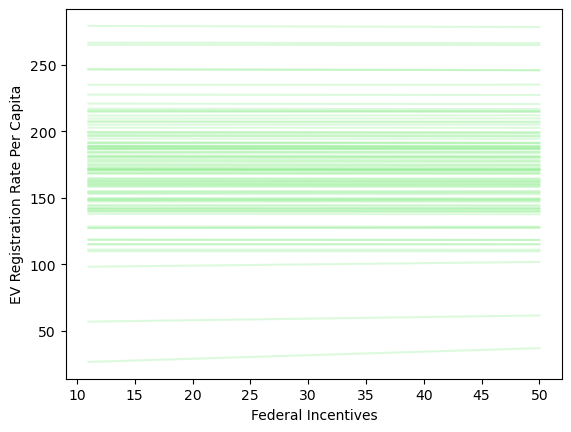

In [8]:
bootstrapped_states = list()
for i in range(100):
    bootstrapped_sample = data.sample(n=25, replace=True)
    bootstrapped_states.append(bootstrapped_sample)

domain = np.arange(11, 51).reshape(-1, 1)

for i in range(100):
    df = bootstrapped_states[i]

    bt_model = LinearRegression().\
    fit(df[["renewable_prod"]].values, df["new_reg_per_capita"].values)
    y_pred = bt_model.predict(domain)
    sns.lineplot(x=domain.\
                 reshape(-1), y=y_pred, color="lightgreen", alpha=0.3)

# Given code
plt.xlabel("Federal Incentives")
plt.ylabel("EV Registration Rate Per Capita")
plt.show()

In [ ]:
The slope is near

**Part 3: Overall Multivariate Regression Model**

$H_{0}$ : None of the predictor variables is useful in terms of predicting the EV registration (~adoption) rate.
- $EV\_Registration_{st} = \beta_0 + \beta_1 Min\_Price_t + \beta_2 Federal\_Incentive_t + \beta_3 Renewable\_Production_{st} + \beta_4 Charge\_Stations_{st} + \alpha_s + \lambda_t + \epsilon_{st}$

<br>

$H_{A}$ : At least one of the predictor variables (minimum price, federal incentives, charging stations, renewable energy production) is useful in terms of predicting the state-level EV registration rates.
- $\beta_i ≠ 0$ (where i ~ [1, 4])

In [ ]:
data = data.set_index(['state', 'year'])

In [ ]:
input_var = ['min_price', 'incentives', 'renewable_prod', 'charge_per_capita']
# input_var = ['min_price', 'incentives', 'renewable_prod', 'charge_stations']

X = data[input_var]
X = sm.add_constant(X)

# Per Capita
y = data['new_reg_per_capita'] # Option 1
# y = data['reg_rate_per_capita']
# y = data['reg_per_capita'] # Option 2
# y = data['registration']

# Fit PanelOLS with fixed effects
model = PanelOLS(y, X, entity_effects=True).fit()
print(model.summary)

**Interpretation of Coefficients**
- $\beta_0$ (const): The constant term is not statistically significant (p=0.955) and does not provide any meaningful insight into EV registrations per capita when all other variables are held constant.
- $\beta_1$ (min_price): A decrease in the minimum EV price is statistically significant (p=0.019) and is associated with an increase in EV registrations per capita. However, the effect size is very small: for every unit decrease in the minimum EV price, registrations per capita increase by approximately 1.03×10−7.
- $\beta_2$ (incentives): Federal EV incentives are highly significant (p=0.000) and positively correlated with EV registrations per capita. For each additional federal incentive, registrations per capita increase by approximately 0.0001.
- $\beta_3$ (renewable_prod): Renewable energy production is not statistically significant (p=0.165) in predicting EV registrations per capita, indicating no clear evidence of an association in this model.
- $\beta_4$ (charge_stations): Charging stations per capita are marginally significant (p=0.056). This suggests that an increase in charging stations can lead to a slight rise in EV registrations per capita. For every unit increase in charging stations per capita, registrations increase by approximately 0.011.

## Evaluation of Significance: 

## Conclusions: 

## Limitations: 

## Acknowledgements and Bibliography: 

**<h4>Current Notebook</h4>**

<p style="padding-left: 40px; text-indent: -40px;">
Das, P.K., & Bhat, M.Y. (2021). Renewable energy policies and EV adoption. <i>Environmental Science and Pollution Research</i>. Retrieved from <a href="https://link.springer.com/article/10.1007/s11356-021-18211-w">https://link.springer.com/article/10.1007/s11356-021-18211-w</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
Javadnejad, R., et al. (2023). Federal tax credits and EV adoption. <i>Environment, Development and Sustainability</i>. Retrieved from <a href="https://link.springer.com/article/10.1007/s10669-023-09958-3">https://link.springer.com/article/10.1007/s10669-023-09958-3</a>
</p>

---

**<h4>Data Cleaning Notebook (INFO2950_Phase_4_Data)</h4>**

<p style="padding-left: 40px; text-indent: -40px;">
    Federal Highway Administration. (2023, March 14). <i>Biden-Harris Administration opens applications for first round of $2.5 billion program to build EV charging infrastructure</i>. Retrieved from <a href="https://highways.dot.gov/newsroom/biden-harris-administration-opens-applications-first-round-25-billion-program-build-ev">https://highways.dot.gov/newsroom/biden-harris-administration-opens-applications-first-round-25-billion-program-build-ev</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    Federal Highway Administration. (n.d.). <i>Fixing America's Surface Transportation Act or "FAST Act"</i>. Retrieved from <a href="https://ops.fhwa.dot.gov/fastact/#:~:text=Fixing%20America's%20Surface%20Transportation%20Act%20or%20%22FAST%20Act%22&text=On%20December%204%2C%202015%2C%20President,funding%20certainty%20for%20surface%20transportation.">https://ops.fhwa.dot.gov/fastact/#:~:text=Fixing%20America's%20Surface%20Transportation%20Act%20or%20"FAST Act"</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    Joint Office of Energy and Transportation (2023, September 21). <i>EV Charger Reliability and Accessibility Accelerator Webinar</i>. Retrieved from <a href="https://driveelectric.gov/webinars/ev-charger-reliability-accessibility-accelerator">https://driveelectric.gov/webinars/ev-charger-reliability-accessibility-accelerator</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    National Renewable Energy Laboratory. (n.d.). <i>American Made Program 5-Year Report</i>. Retrieved from <a href="https://americanmadechallenges.org/American-Made-Program-5-Year-Report.pdf">https://americanmadechallenges.org/American-Made-Program-5-Year-Report.pdf</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    Open Charge Map. (2024). <i>Open Charge Map API</i>. Retrieved November 20, 2024, from <a href="https://openchargemap.org/site/develop/api">https://openchargemap.org/site/develop/api</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
U.S. Census Bureau, Population Division. (2019). Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2019 (NST-EST2019-01) [Data file]. Retrieved from <a href="https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx">https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Census Bureau, Population Division. (2023). <i>Annual Estimates of the Resident Population for the United States, Regions, States, District of Columbia, and Puerto Rico: April 1, 2020 to July 1, 2023 (NST-EST2023-POP) [Data file]</i>. Retrieved from <a href="https://www2.census.gov/programs-surveys/popest/tables/2020-2023/state/totals/NST-EST2023-POP.xlsx">https://www2.census.gov/programs-surveys/popest/tables/2020-2023/state/totals/NST-EST2023-POP.xlsx</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Agriculture. (2022). <i>EV Charging Stations Fact Sheet</i>. Retrieved from <a href="https://www.rd.usda.gov/sites/default/files/508_RD_FS_71EVChargingStations.pdf">https://www.rd.usda.gov/sites/default/files/508_RD_FS_71EVChargingStations.pdf</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Energy. (2023). <i>Alternative Fuels Data Center: Vehicle Registration Data</i>. Retrieved from <a href="https://afdc.energy.gov/vehicle-registration?year=2023">https://afdc.energy.gov/vehicle-registration?year=2023</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Energy. (2023). <i>Domestic Manufacturing Conversion Grants</i>. Retrieved from <a href="https://www.energy.gov/mesc/domestic-manufacturing-conversion-grants">https://www.energy.gov/mesc/domestic-manufacturing-conversion-grants</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Energy. (n.d.). <i>Find and Compare Cars</i>. Retrieved from <a href="https://www.fueleconomy.gov/feg/PowerSearch.do?action=noform&year1=2016&year2=2023&minmsrpsel=0&maxmsrpsel=0&city=0&hwy=0&comb=0&cbvtelectric=Electric&YearSel=2016-2023&make=&mclass=&vfuel=&vtype=Electric&trany=&drive=&cyl=&MpgSel=000&sortBy=Comb&Units=&url=SearchServlet&opt=new&minmsrp=0&maxmsrp=0&minmpg=0&maxmpg=0&sCharge=&tCharge=&startstop=&cylDeact=&rowLimit=200&pageno=1&tabView=0">https://www.fueleconomy.gov/feg/PowerSearch.do?action=noform&year1=2016&year2=2023</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Energy, Office of Energy Efficiency & Renewable Energy. (2024). <i>Alternative Fuels Data Center: Data Download [Data file]</i>. Retrieved November 20, 2024, from <a href="https://afdc.energy.gov/data_download">https://afdc.energy.gov/data_download</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Transportation. (n.d.). <i>Resilient Surface Transportation Grants</i>. Retrieved from <a href="https://www.transit.dot.gov/grants?combine=Resilient+Surface+Transportation+Grants&field_grant_type_target_id=All">https://www.transit.dot.gov/grants?combine=Resilient+Surface+Transportation+Grants&field_grant_type_target_id=All</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Energy Information Administration. (n.d.). <i>State Energy Data System (SEDS): 1960-2021 (Complete) [Data file]</i>. Retrieved from <a href="https://www.eia.gov/state/seds/sep_prod/SEDS_Production_Report.pdf">https://www.eia.gov/state/seds/sep_prod/SEDS_Production_Report.pdf</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Environmental Protection Agency. (2022). <i>Bipartisan Infrastructure Law Clean School Bus Program: Initial Implementation Report to Congress</i>. Retrieved from <a href="https://nepis.epa.gov/Exe/ZyPDF.cgi?Dockey=P1014098.pdf">https://nepis.epa.gov/Exe/ZyPDF.cgi?Dockey=P1014098.pdf</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Environmental Protection Agency. (2024, April 24). <i>Biden-Harris Administration announces nearly $1 billion in grants to invest in America's clean energy future</i>. Retrieved from <a href="https://www.epa.gov/newsreleases/biden-harris-administration-announces-nearly-1-billion-grants-invest-americas-clean-0">https://www.epa.gov/newsreleases/biden-harris-administration-announces-nearly-1-billion-grants-invest-americas-clean-0</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    WE ACT for Environmental Justice. (2023). <i>TCTAC</i>. Retrieved from <a href="https://www.weact.org/tctac/">https://www.weact.org/tctac/</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    Western Interstate Energy Board. (n.d.). <i>Western Interstate Energy Board supports continued funding for the U.S. Department of Energy State Energy Program (SEP)</i>. Retrieved from <a href="https://www.westernenergyboard.org/western-interstate-energy-board-supports-continued-funding-for-the-u-s-department-of-energy-state-energy-program-sep/">https://www.westernenergyboard.org/western-interstate-energy-board-supports-continued-funding-for-the-u-s-department-of-energy-state-energy-program-sep/</a>
</p>




